<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Dimensionality%20Reduction/PCA_DimRid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DIMENSIONALITY REDUCTION USING PCA

## Table of Contents

1.   [Get Data](#Section1)
2.   [Basic EDA](#Section2)
3.   [Pre-Modeling](#Section3)
4.   [Modeling](#Section4)
5.   [Post Modeling](#Section5)

## Problem Statement

In real world, number of columns is the number of dimensions of data.However, some columns are similar, some are correlated, some are duplicates in some way, some are junk, some are useless, etc. so the actual number of dimensions can be unknown. Its a knotty problem.

When dealing with real problems and real data we often deal with high dimensional data that can go up to millions.

    Sometime we might need to deal with data having large number of columns/variables, so we need to reduce its dimensionality.
    The need to reduce dimensionality is often associated with visualizations (reducing to 2–3 dimensions so we can plot it) but that is not always the case.
    Sometimes we might value performance over precision so we could reduce 1,000 dimensional data to 10 dimensions so we can manipulate it faster (eg. calculate distances).
    Find essential attributes/variables.


## 1. Get Data

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/pca-file/master/train.csv')

In [0]:
data.head()
# There are almost 5k columns all seems integers y is Target column

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,1300000.0,...,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [0]:
data.describe()
# Max Columns has zero values and its seems like there are many columns with zero SD i.e all values are same

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,1.552158e+05,1.950500e+05,8.522090,3.595874e+03,2.258015e+06,2.680843e+05,4.588255e+04,4.451478e+04,3.968961e+05,2.883129e+04,1.940794e+03,4.483841e+05,7.989729e+04,1.548394e+05,1.128254e+05,1.148329e+05,3.377439e+03,0.0,3.794130e+05,1.202247e+05,7.426464e+05,4.994842e+03,1.725258e+06,1.941882e+05,0.0,9.338327e+04,6.296896e+05,0.0,1.249545e+06,1.200042e+06,...,2.412200e+03,3.767589e+05,6.669478e+05,4.281949e+04,6.279435,1.409112e+05,2.364780e+05,7.627485e+05,6.752640e+05,5.428654e+05,7.776979e+05,1.004851e+05,3.825025e+05,2.539583e+03,3.767661e+03,4.153891e+04,7.041224e+04,9.648562e+04,9.751240e+05,2.910967e+04,7.599802e+04,3.588248e+03,1.796016e+05,5.302810e+05,2.377396e+05,1.183135e+06,1.247793e+06,9.867683e+02,6.165015e+04,1.289495e+05,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,1.587815e+06,2.397372e+06,569.068911,1.245435e+05,1.552298e+07,3.026910e+06,8.140674e+05,1.354504e+06,3.238243e+06,5.705388e+05,2.786022e+04,6.370644e+06,2.846440e+06,2.425794e+06,1.161275e+06,2.747535e+06,1.313839e+05,0.0,3.561409e+06,4.867503e+06,3.799941e+06,1.868664e+05,9.034308e+06,1.481349e+06,0.0,8.547764e+05,6.956380e+06,0.0,7.361173e+06,8.113234e+06,...,1.498586e+05,7.755051e+06,6.261373e+06,5.473370e+05,322.557139,2.052878e+06,1.533062e+06,5.816722e+06,7.444468e+06,4.250172e+06,4.287643e+06,9.150068e+05,2.799848e+06,1.508683e+05,2.515884e+05,1.179500e+06,2.810830e+06,1.114863e+06,9.750283e+06,7.912064e+05,1.206581e+06,2.396080e+05,1.660884e+06,4.497567e+06,4.109065e+06,1.139493e+07,6.878895e+06,6.589219e+04,2.124731e+06,1.335938e+06,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

In [0]:
# first number of zeros and null values
# LIb : need pandas lib for this function.
# Parameters : Only required dataframe for which you want zeros and null for each column
# return: dataframe with number of zeros and null

def get_number_zeros_null(df):
  '''
       LIb : need pandas lib for this function.

       Input : Only required dataframe for which you want zeros and null for each column       
       Output: dataframe with number of zeros and null
  '''
  null_zero_dict={ }
  null_zero_dict['Number_of_nulls'] = df.isnull().sum()
  null_zero_dict['Number_of_zeros'] = (df==0).astype(int).sum()
  return pd.DataFrame(null_zero_dict).T

In [0]:
get_number_zeros_null(data)
# No null values in data
# Task1: There are 4459 rows and see number of zeros we can remove columns with more than 4000 zeros in the columns

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
Number_of_nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Number_of_zeros,0,0,4420,4455,4426,4457,4454,4412,4454,4454,2965,4336,4294,4458,4453,3940,4299,4424,4434,4125,4431,4432,4420,4438,4380,4328,4448,4455,4459,4203,4420,3899,4449,3714,4144,4459,4242,4313,4459,3705,...,4442,4375,4243,4377,4457,4387,4134,3959,4308,4060,3816,4241,4075,4455,4458,4446,4440,4357,4284,4450,4370,4458,4326,4002,4426,4127,3747,4458,4427,4353,4168,4274,3766,4294,4458,4424,4441,4425,4379,4296


In [0]:
data.info(verbose=True)
# all are int or floart except ID 

## Pre Modeling

In [0]:
def get_catagorical_data_columns(df):
  '''
      return list of all catagoric data columns name
  '''
  return list(set(df.columns) - set(df._get_numeric_data().columns))

In [0]:
def get_numeric_data_columns(df):
  '''
      return list of all numeric data columns name
  '''
  return list(df._get_numeric_data().columns)

In [0]:
## NOTE*** Before use this do dataframe scaling 

# The main motive is to find difference between max value and the quantile_threshold value and 
#draw a line graph to see is there any possible outlier 

def get_thresholdDiff_outliers(df,quantile_threshold):
  '''
      The main motive is to find difference between max value and the quantile_threshold value and 
      draw a line graph to see is there any possible outlier. 
      
      input: dataframe, quantile_threshold
      output: df with column name and diff of max value and the quantile_threshold
  '''
  columns_numeric = get_numeric_data_columns(data)
  quantile = []
  dict_quantile={}
  for col in columns_numeric:
    dict_quantile[col] = data[col].max() - data[col].quantile(quantile_threshold)
  result = pd.DataFrame(dict_quantile,index=[0]).T
  result['columns_name'] = result.index
  result['Difference'] = result[0]
  result.reset_index(drop=True,inplace=True)
  result.drop([0],axis=1,inplace=True)
  return result


In [0]:
import seaborn as sns

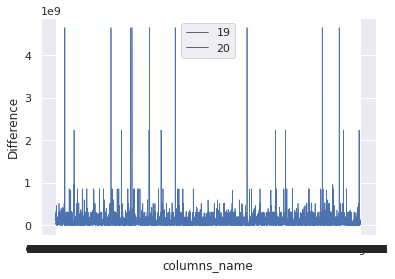

In [0]:
sns.set()
sns.lineplot(x = 'columns_name',y='Difference',data=result,size=20)

In [0]:
# how to see distribution of data if more than 5000 columns are there
# Solution: One thing is find SD of all the columns and is SD is large than distribution is not good 
import numpy as np

def get_SD_columns(df):
  columns_numeric = get_numeric_data_columns(df)
  dist_sd = {}
  for col in columns_numeric:
    dist_sd[col] = np.std(df[col])
  result = pd.DataFrame(dist_sd,index=[0]).T
  result['columns_name'] = result.index
  result['SD'] = result[0]
  result.reset_index(drop=True,inplace=True)
  result.drop([0],axis=1,inplace=True)
  return result


In [0]:
get_SD_columns(data)

,columns_name,SD
0,target,8.233388e+06
1,48df886f9,3.892862e+05
2,0deb4b6a8,6.427582e+04
3,34b15f335,5.699013e+05
4,a8cb14b00,2.358860e+05
...,...,...
4987,71b203550,4.720179e+06
4988,137efaa80,1.614441e+06
4989,fb36b89d9,4.318016e+06
4990,7e293fbaf,1.635810e+06


In [0]:
def remove_column_SD_Zero(df):
  numeric_columns = get_numeric_data_columns(df)
  drop_column = []
  for col in numeric_columns:
    if np.std(df[col])== 0 :
      drop_column.append(col)
  return drop_column



In [0]:
len(remove_column_SD_Zero(data))

256

In [0]:
data.drop(remove_column_SD_Zero(data),axis=1,inplace=True)

In [0]:
data.shape

(4459, 4737)

In [0]:
zero_df = get_number_zeros_null(data)

In [0]:
zero_df

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,233c7c17c,2cb4d123e,87ffda550,822e49b95,316b978cd,d04e16aed,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
Number_of_nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Number_of_zeros,0,0,4420,4455,4426,4457,4454,4412,4454,4454,2965,4336,4294,4458,4453,3940,4299,4424,4434,4125,4431,4432,4420,4438,4380,4328,4448,4455,4203,4420,3899,4449,3714,4144,4242,4313,3705,3747,4339,4160,...,4442,4375,4243,4377,4457,4387,4134,3959,4308,4060,3816,4241,4075,4455,4458,4446,4440,4357,4284,4450,4370,4458,4326,4002,4426,4127,3747,4458,4427,4353,4168,4274,3766,4294,4458,4424,4441,4425,4379,4296


In [0]:
# drop Id column
data.drop('ID',axis=1,inplace=True)

## Modeling

In [0]:
# Spliting of data
X = data.drop('target',axis = 1)
y= data['target']


In [0]:
# Scaling of the value?
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
x_value_sc = sc.transform(X)

In [0]:
 x_value_df = pd.DataFrame(x_value_sc,columns=X.columns)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_value_df,y,test_size=0.3,random_state=0)

In [0]:
# Do random forest without PCA
import time
from sklearn.ensemble import RandomForestRegressor

In [0]:
# base model
rf = RandomForestRegressor()
rf_fit = rf.fit(X_train,y_train)
y_predict = rf_fit.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np
print("RMSE id {}".format(np.sqrt(mean_squared_error(y_predict,y_test))))

RMSE id 7343485.4746330045


In [0]:
## PCA

from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=0.99).fit(x_value_df)


In [0]:
df_x = pca.transform(x_value_df)


4735

In [0]:
df_x

array([[-3.34425759e+00,  1.33573265e+00, -3.68745498e-01, ...,
         1.90979829e-01, -7.04800622e-01, -2.27177454e-01],
       [-3.51430516e+00,  5.58524601e-01, -5.86445688e-01, ...,
        -8.46871610e-01,  2.24566419e+00, -1.10836903e+00],
       [-4.77426124e+00,  5.02762328e-01, -9.39665349e-01, ...,
        -1.36296087e-01,  3.00227857e-02, -1.55843929e-01],
       ...,
       [ 7.14049468e-01,  4.24261041e+00,  1.32336431e+00, ...,
         4.25314008e-03, -1.53519959e-01,  4.95916801e-03],
       [-4.71009004e+00,  6.26331549e-01, -9.96492036e-01, ...,
         1.36098440e-02, -1.83016786e-03,  5.79865046e-02],
       [ 1.25369041e-01,  2.14392601e+00, -3.19030960e-01, ...,
        -4.26125031e-03, -7.60888013e-02,  3.38644375e-02]])

In [0]:
pca.n_components_

2140

In [0]:
df_x.shape
# now i have 1527 components with 95% information of data

(4459, 2140)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

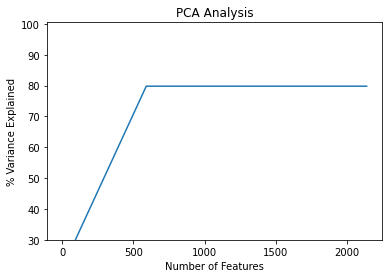

In [0]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [0]:
## Modeling After PCA
X_train,X_test,y_train,y_test = train_test_split(df_x,y,test_size=0.3,random_state=0)

rf = RandomForestRegressor()
rf_fit = rf.fit(X_train,y_train)
y_predict = rf_fit.predict(X_test)

In [0]:
print("RMSE id {}".format(np.sqrt(mean_squared_error(y_predict,y_test))))

RMSE id 7382055.17919535


## Modeling 2

In [0]:
from sklearn.model_selection import ShuffleSplit

In [0]:
ss = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )

In [0]:
ss

ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.7)

In [0]:
from sklearn.model_selection import cross_validate

In [0]:
# Spliting of data
X = data.drop('target',axis = 1)
y= data['target']

In [0]:
import time
from sklearn.ensemble import RandomForestRegressor


In [0]:
import sklearn

In [0]:
rf = RandomForestRegressor()
result = cross_validate(rf,X,y,cv=ss,return_train_score=True,return_estimator=True,n_jobs=-1,scoring=sklearn.metrics.SCORERS)

In [0]:
result['fit_time'].mean()

0.8348233222961425

In [0]:
from sklearn.model_selection import cross_validate

def do_crossValidation(algo_object,X,y,cv,scoring):
  '''
      Return : return data frame 
  '''
  algo_name = algo_object.__class__.__name__ 
  cc = cross_validate(algo_object, X, y, cv=cv, return_train_score=True, return_estimator=True, n_jobs=-1, scoring=scoring)
  return get_crossValidation_Result(algo_name,cc)



def get_crossValidation_Result(algo_name,result):
  result_dict = {}
  result_dict['Algo Name'] = algo_name
  result_dict['Time'] = result['fit_time'].mean()
  result_dict['Algo Train Accuracy Score']= result['train_score'].mean()
  result_dict['Algo Test Accuracy Score'] = result['test_score'].mean()
  result_dict['Algo Test Accuracy 3*STD'] = result['test_score'].std()*3
  return pd.DataFrame(result_dict) 

In [0]:
# Shuffle split is use as CV in cross validation and Grid search same as train test split 

# n_split is number of split and test_size is how much % of rows you want in test data set
from sklearn.model_selection import ShuffleSplit

def do_shufflesplit(n_splits,test_size):  
  return ShuffleSplit(n_splits = n_splits, test_size = test_size/100, train_size = 1-(test_size/100), random_state = 0)

In [0]:
# Spliting of data
X = data.drop('target',axis = 1)
y= data['target']

result = do_crossValidation(RandomForestRegressor(),X,y, do_shufflesplit(10,30),'f1')

In [0]:
# Lavi Code for GridSearch

# Helper Class for Initilizing GridSearch

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    # Init function as we create object of this class this function call
    def __init__(self, models, params):
      '''
      models and params are dict
      '''
      if not set(models.keys()).issubset(set(params.keys())):
        missing_params = list(set(models.keys()) - set(params.keys()))
        raise ValueError("Some estimators are missing parameters: %s" % missing_params)
      self.models = models
      self.params = params
      self.keys = models.keys()
      self.grid_searches = {}
      self.best_params = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=True):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs  
            self.best_params[key]  = str(gs.best_params_)

            # print (gs.best_params_.feature_importances_ )
            # try:
            #   print(gs.best_params_.feature_importances_ )
            #   self.feature_importance[key]= gs.best_params_.feature_importances_ 
            # except AttributeError:
            #   pass

    # def Feature_Importance(self):
    #   for each

    # def returnFeatureImportance(self):


    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
models1 = {
    
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
    
}

params1 = {
    'LinearRegression': { 'fit_intercept':[True,False]},  # l1 lasso l2 ridge
    'DecisionTreeRegressor': {'criterion' : ['mse', 'friedman_mse', 'mae'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]},
    'RandomForestRegressor': { 'n_estimators': [16, 32] }    
}

In [0]:
modeling1 = EstimatorSelectionHelper(models1,params1)

In [0]:
X.drop('ID',axis=1,inplace=True)

In [0]:
modeling1.fit(X,y,cv=3,n_jobs = -1)

Running GridSearchCV for LinearRegression.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.5min finished


Running GridSearchCV for DecisionTreeRegressor.
Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.9s


In [0]:
modeling1.score_summary()